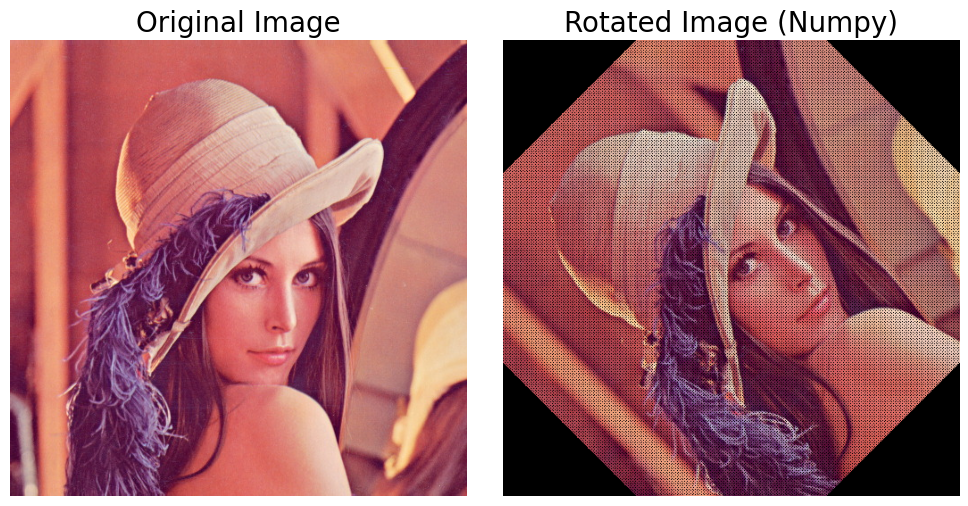

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# 이미지 로드
image_rgb = plt.imread('lena.jpg')

# 회전 각도 설정
angle = 45  # 회전 각도 (45도)
angle_rad = np.deg2rad(angle)  # 각도를 라디안으로 변환

# 이미지 크기
height, width, channels = image_rgb.shape

# 회전 중심 (이미지 중심으로 설정)
center_x, center_y = width // 2, height // 2

# 반시계 방향 회전 변환 행렬 계산 (부호만 변경)
rotation_matrix = np.array([[np.cos(angle_rad), np.sin(angle_rad)],  # 부호 변경
                            [-np.sin(angle_rad), np.cos(angle_rad)]])

# 회전할 픽셀의 x, y 좌표 생성
x_coords, y_coords = np.meshgrid(np.arange(width), np.arange(height))
coords = np.vstack((x_coords.ravel() - center_x, y_coords.ravel() - center_y))

# 회전 적용
rotated_coords = np.dot(rotation_matrix, coords)
rotated_x = rotated_coords[0, :] + center_x
rotated_y = rotated_coords[1, :] + center_y

# 회전된 좌표를 정수로 변환
rotated_x = np.round(rotated_x).astype(int)
rotated_y = np.round(rotated_y).astype(int)

# 회전된 이미지를 위한 빈 배열 생성
rotated_image = np.zeros_like(image_rgb)

# 유효한 좌표에 대해 회전된 이미지에 픽셀 값을 할당
valid_coords = (rotated_x >= 0) & (rotated_x < width) & (rotated_y >= 0) & (rotated_y < height)
rotated_image[rotated_y[valid_coords], rotated_x[valid_coords]] = image_rgb[y_coords.ravel()[valid_coords], x_coords.ravel()[valid_coords]]

# 결과를 Matplotlib으로 출력
plt.figure(figsize=(10, 5))
fs = 20  # 폰트 사이즈

# 원본 이미지
plt.subplot(1, 2, 1)
plt.imshow(image_rgb)
plt.title("Original Image", fontsize=fs)
plt.axis("off")

# 반시계 방향으로 회전된 이미지
plt.subplot(1, 2, 2)
plt.imshow(rotated_image)
plt.title(f"Rotated Image (Numpy)", fontsize=fs)
plt.axis("off")

plt.tight_layout()
plt.show()